In [152]:
import math as math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [153]:
class Value: 
  
  def __init__(self, data, _children = (), _op='', label=''):
    self.data = data
    self.grad = 0
    self._prev = _children
    self._op = _op
    self.label = label
    def _backward():
      pass
    
    self._backward = _backward
  
  def __repr__(self):
    return f'Value(data={self.data}, _prev={self._prev}, _op={self._op}, label={self.label})'
  
  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    def _backward():
      # local gradient of the sum function with respect to self multiplied by the incoming gradient
      self.grad += 1 * out.grad 
      # local gradient of the sum function with respect to other multiplied by the incoming gradient
      other.grad += 1 * out.grad
    
    out._backward = _backward
    return out
  
  # def __sub__(self, other):
  #   return Value(self.data - other.data)
  
  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    
    out._backward = _backward      
    return out
  
  
  def tanh(self):
    n = self.data
    t = (math.exp(2 * n) -1) / (math.exp(2 * n) + 1)
    out = Value(t, (self,), 'tanh')
        
    def _backward():
      self.grad += (1 - t ** 2) * out.grad
    
    out._backward = _backward
    
    return out
  



In [154]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label= 'c')
e = a * b; e.label = 'e'
d = e +c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L.grad = 1.0

print('a + b =', a + b)
print('a * b =', a * b)

print('d = a * b + c :=> ', d)

a + b = Value(data=-1.0, _prev=(Value(data=2.0, _prev=(), _op=, label=a), Value(data=-3.0, _prev=(), _op=, label=b)), _op=+, label=)
a * b = Value(data=-6.0, _prev=(Value(data=2.0, _prev=(), _op=, label=a), Value(data=-3.0, _prev=(), _op=, label=b)), _op=*, label=)
d = a * b + c :=>  Value(data=4.0, _prev=(Value(data=-6.0, _prev=(Value(data=2.0, _prev=(), _op=, label=a), Value(data=-3.0, _prev=(), _op=, label=b)), _op=*, label=e), Value(data=10.0, _prev=(), _op=, label=c)), _op=+, label=d)


##### Expression Tree Visualisation

In [155]:
from graphviz import Digraph

def trace(root):
  # build a set of all node and edges in a graph
  nodes, edges = set(), set()
  def visit(node):
    if node not in nodes:
      nodes.add(node)
      for prev in node._prev:
        edges.add((prev, node))
        visit(prev)
  visit(root)
  return nodes, edges

def draw_dot(root):
  
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    dot.node(uid, label='{'+f'{n.label}|{n._op}, data: {n.data:.4f}\n|grad: {n.grad:.4f}'+'}', shape='record')
    if n._op:
      # if n is an operation node, show the operation symbol
      dot.node( name = uid + n._op, label=n._op, shape='diamond')
      # create an edge from the operation node to n
      dot.edge(uid + n._op, uid)
    
  for n1, n2 in edges:
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)
  
  return dot
  

In [156]:
f.grad = 4.0 # dL/df = 4.0 because L = d*f and dL/df = d and d = 4.0
d.grad = -2 # dL/dd = 1.0 because L = d*f and dL/dd = f and f = -2.0

Calculating dL / dc  

dd/dc  
d = c + e  
dd/dc = 1  
dd/de = 1  

L = d * f   
L = (c + e) * f   

WANT:  dL/dc - ?   
KNOW: dL/dd = -2, dd/dc = 1   
dL/dd = dL/dd * dd/dc   
dL/dc = f * 1 = f   
dL/de = dL/dd * dd/de = -2 * 1 = -2   

In [157]:
c.grad = -2.0
e.grad = -2.0

Calculating dL/da  
dL/da = dL/de * de/da = dL/dd * dd/de  * de/da  
dL/da = -2.0 * -3.0 = 6.0 


In [158]:
a.grad = 6.0
b.grad = -4.0

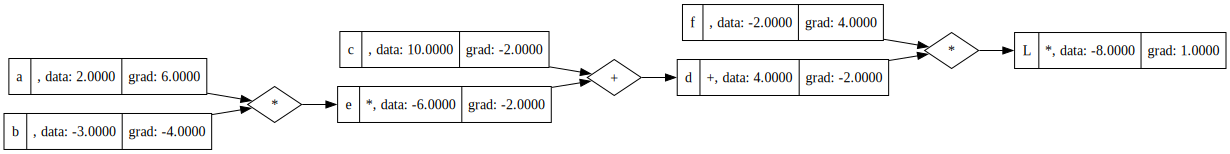

In [159]:
draw_dot(L)

In [160]:
# calculating gradian of L numericallly with step size 0.00001
def gradient_with_fixed_step():
  h = 0.00001
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label= 'c')
  e = a * b; e.label = 'e'
  d = e +c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  l1Val = L.data
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label= 'c')
  e = a * b; e.label = 'e'
  d = e +c; d.label = 'd'
  d.data += h
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  l2Val = L.data
  
  print((l2Val - l1Val)/h)
  
gradient_with_fixed_step()

-1.9999999999242843


##### Backpropagate throw neuron

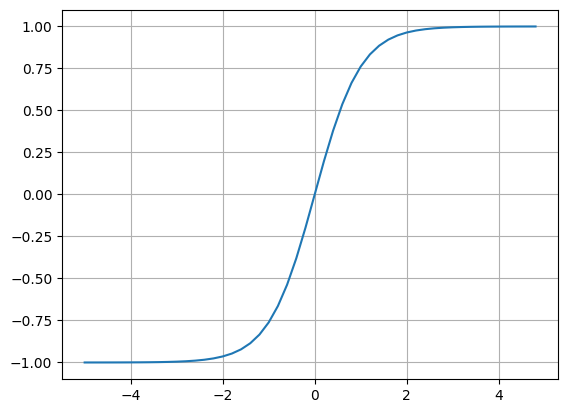

In [161]:

plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

In [162]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'


In [163]:
o.grad = 1.0

In [164]:
# a = tanh(n) = (exp(2n) - 1) / (exp(2n) + 1)
# dL/dn = 1 - tanh(n)**2 = 1 - o**2
n.grad = o.grad * (1 - o.data**2)
n.grad

x1w1x2w2.grad = n.grad
b.grad = n.grad

x1w1.grad = x1w1x2w2.grad
x2w2.grad = x1w1x2w2.grad

x2.grad = x2w2.grad * w2.data
w2.grad = x2w2.grad * x2.data

x1.grad = x1w1.grad * w1.data
x2.grad = x2w2.grad * w2.data

x1w1.grad = x1w1x2w2.grad
x2w2.grad = x1w1x2w2.grad

w1.grad = x1w1.grad * x1.data
x1.grad = x1w1.grad * w1.data

x2.grad = x2w2.grad * w2.data
w2.grad = x2w2.grad * x2.data

n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'


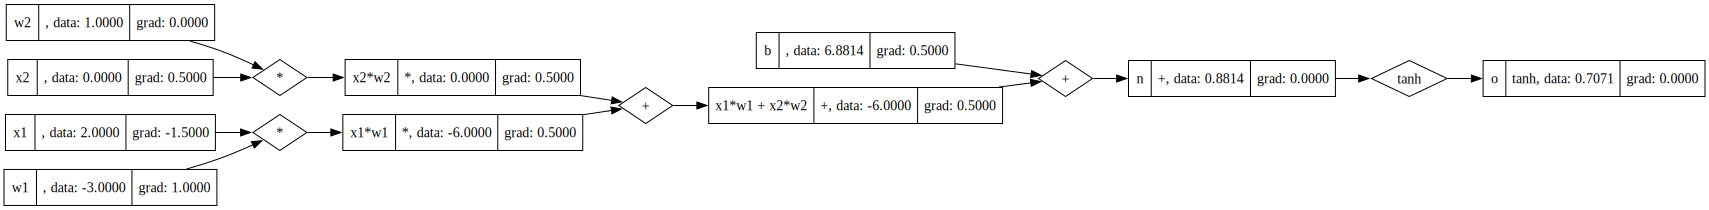

In [165]:
draw_dot(o)

##### Utilizing programmable backward propagation

In [166]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'


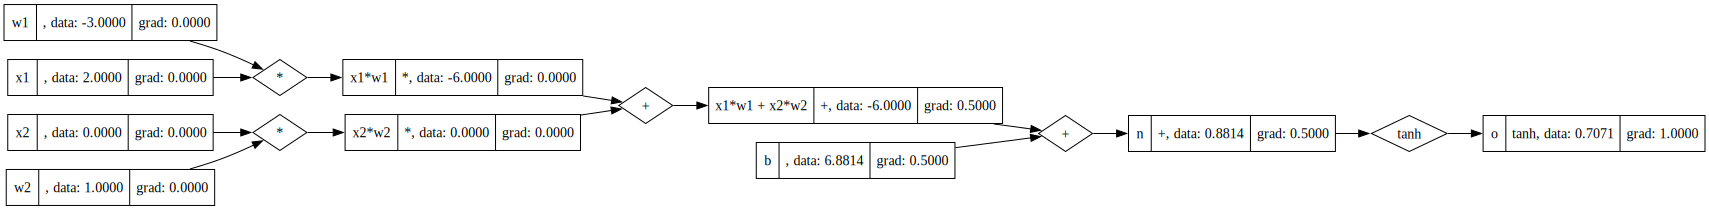

In [167]:
o.grad = 1.0
o._backward()
n._backward()
b._backward()

draw_dot(o)